### Problem: Maximize f(x) = x<sup>2</sup> - 11x + 150 when x = 0 to 255

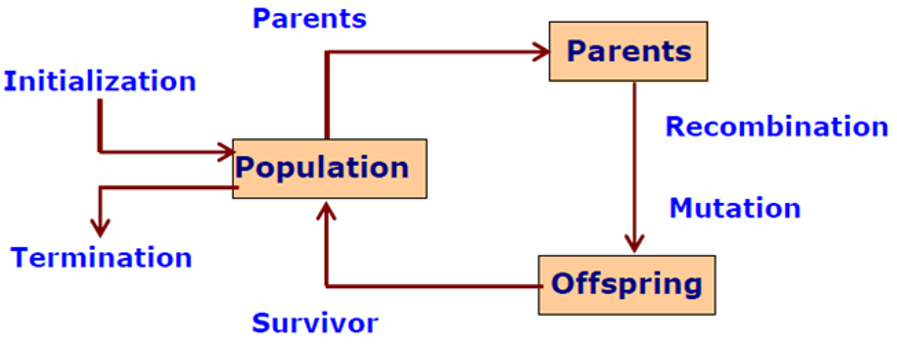

Representation or ecoding solution:
x can be represented using 8 bits binary number.

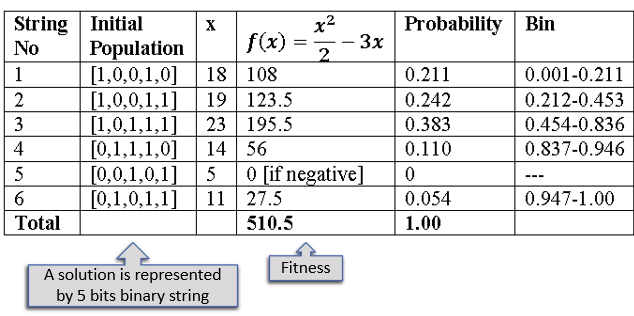

# Step 1: Initialize Population

In [1]:
import numpy as np
import random
def initPopulation(b=8, n =10): # n is the number of solutions, b is the length
    return [random.choices([0,1],k = b) for i in range(n)]


In [4]:
popn = initPopulation(8,10)
popn

[[0, 1, 1, 1, 0, 1, 0, 1],
 [0, 1, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 1, 0, 1],
 [0, 1, 1, 1, 0, 1, 1, 0],
 [1, 1, 0, 0, 1, 1, 0, 1],
 [0, 1, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 1, 0]]

# Step 2: Reproduction or Parent Selection

Fitness Calculation

In [6]:
def binToDecimal(binList):
  decValue = 0 # decimel value
  power = len(binList)
  for digit in binList: # binary to decimel
    decValue += digit*2**(power-1)
    power -= 1
  return decValue

def fitnessFunction(x):
  return x**2 - 11*x + 150

def getFitness(p): # p is the whole population
    fitness = [] # to store fitness values
    for sol in p:
        d = binToDecimal(sol)
        f = fitnessFunction(d)
        if f < 0: fitness.append(0)
        else: fitness.append(f) # fitness function
    return fitness

In [ ]:
binToDecimal([0,1,1,1,0])

14

In [ ]:
fitnessFunction(14)

192

In [7]:
fitness_list = getFitness(popn)
print(fitness_list)
total_fitness = sum(fitness_list)
probability = [round(f/total_fitness,3) for f in fitness_list]
print(probability)
print(np.cumsum(probability))

[12552, 9050, 132, 41532, 25560, 12776, 39920, 9050, 60882, 23376]
[0.053, 0.039, 0.001, 0.177, 0.109, 0.054, 0.17, 0.039, 0.259, 0.1]
[0.053 0.092 0.093 0.27  0.379 0.433 0.603 0.642 0.901 1.001]


calculate probability and select parents

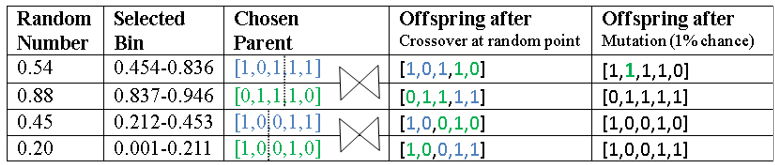

In [8]:
def select_parent(n, pop): # probability, parent selection
    # probability
    fitness = getFitness(pop)
    total_fitness = sum(fitness)
    prob = [f/total_fitness for f in fitness]
    cumSumProb = np.cumsum(prob)
    #print(cumSumProb)
    # parent selection
    parents = []
    for i in range(n):
        # roullete wheel, generate a random number
        r = random.random()
        #print(r)
        # check bin number of r
        for j in range(len(cumSumProb)):
            if r <= cumSumProb[j] :#checking the bin
                #print(j)
                parents.append(pop[j])
                break
    return parents

In [12]:
for p in popn:
  print(p)
print('Parents:')
parents = select_parent(4, popn)
for p in parents:
  print(p)

[0, 1, 1, 1, 0, 1, 0, 1]
[0, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 1, 0, 1]
[0, 1, 1, 1, 0, 1, 1, 0]
[1, 1, 0, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 1, 1, 0]
Parents:
[1, 0, 0, 1, 1, 1, 1, 0]
[0, 1, 1, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 1, 0, 0]
[1, 1, 0, 0, 1, 1, 0, 1]


# Step 3: Crossover

In [ ]:
# define a method crossover (input is parents set)
def cross(p):
  num_cross = len(p)//2
  # print(num_cross)
  offsprings = []
  #  for loop to perform crossovers
  for i in range(num_cross):
   cp = random.choice(range(3,6))
   # print(cp)
   # perform crossover
   x,y = p[0],p[1]
   # modify the above line as the parents will be different for each crossover
   off1 = x[:cp] + y[cp:]
   offsprings.append(off1)

   # write code for off2

  return offsprings

In [ ]:
off = cross(parents)
off

[[1, 0, 1, 0, 1, 1, 1, 0], [1, 0, 1, 0, 1, 1, 1, 0]]

# Step 4: Mutation

In [ ]:
# Perform mutation with 3% probability
# def mutate(offsp, pr = 0.03):


# Step 5: Select Survivor
The selected survivors (solutions) will be added to population

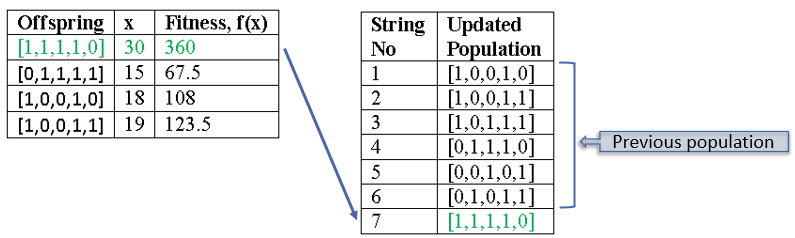

Select top 2 offspring based on fitness value and add them to population.

In [ ]:
# define a method to select top offsprings (input offsprings, top)
def select_survivor(offsp):
  topOffsp = []
  f = getFitness(offsp)
  mInd = f.index(max(f))
  topOffsp.append(offsp[mInd])
  f.pop(mInd)
  #print(f)
  mInd = f.index(max(f))
  topOffsp.append(offsp[mInd])
  return topOffsp

In [ ]:
select_survivor(off)

[[1, 0, 1, 0, 1, 1, 1, 0], [1, 0, 1, 0, 1, 1, 1, 0]]

In [ ]:
def best(p):
  f = getFitness(p)
  mInd = f.index(max(f))
  return p[mInd], max(f)

# **Complete iteration**

In [ ]:
# modify the below code to iterate the process for 3 generations
# in each generation show the best solution in population with fitness value
population = initPopulation(8,10)
print(best(population))
parents = select_parent(4, population)
offsprings = cross(parents)
# call mutation here
survivors = select_survivor(offsprings)
updatedPopulation = population + survivors
updatedPopulation
print(best(updatedPopulation))

([1, 1, 1, 1, 0, 0, 0, 0], 55110)


[[1, 0, 1, 1, 0, 0, 1, 0],
 [0, 1, 0, 1, 1, 1, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 1],
 [1, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 1, 1, 0, 0, 1, 0]]